## 자치구별 공원 분석

In [19]:
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null
# 런타임 다시시작

In [20]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')

In [2]:
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]

Saving 서울공원요약.csv to 서울공원요약.csv


In [3]:
park = pd.read_csv(filename)
park.head()

,공원명,지역,경도,위도,면적,분류,크기
0,남산도시자연공원,중구,126.990377,37.550140,2896887,대형,15
1,길동생태공원,강동구,127.154779,37.540394,80683,소형,3
2,서울대공원,과천시,127.019846,37.426449,9132690,대형,15
3,서울숲,성동구,127.041798,37.543072,480994,중형,7
4,월드컵공원,마포구,126.878907,37.571805,2284085,대형,15


## 1. 자치구별 공원면적과 공원수

In [4]:
df = park.groupby('지역')[['면적']].agg(['sum','count'])
df

면적      
           sum count
지역                  
강남구    3626398     7
강동구    1526390     7
강북구    3714902     4
강서구    2194154     9
과천시    9132690     1
관악구   10431453     2
광진구     584002     2
구로구    1617657     4
금천구      57568     4
노원구   12024307     2
도봉구    1084218     6
동대문구    458664     4
동작구    3706739     7
마포구    2685112     5
서대문구   3321477     4
서초구   13359636     6
성동구     626839     5
성북구    1198327     3
송파구    2838993     7
양천구    1203428     5
영등포구    424446     5
용산구     247194     2
은평구    2986459     7
종로구    3907681    12
중구     2943304     4
중랑구    7078975     6

In [5]:
df.drop(index='과천시', inplace=True)   # index가 '과천시'인 행을 지우는 코드
df.columns = ['공원면적','공원수']
df.head()

,공원면적,공원수
지역,,
강남구,3626398,7
강동구,1526390,7
강북구,3714902,4
강서구,2194154,9
관악구,10431453,2


In [6]:
df.shape

(25, 2)

## 2. 구별 공원면적 비율 및 인당 공원면적 비교



In [7]:
uploaded = files.upload()
filename = list(uploaded.keys())[0]

Saving 서울시 인구와 면적.txt to 서울시 인구와 면적.txt


In [12]:
seoul_df = pd.read_csv(filename, sep='\t')
seoul_df.head()

,기간,지역,인구,면적,인구밀도(명/㎢)
0,2020,합계,"9,911,088",605,"16,376"
1,2020,종로구,"158,996",24,"6,649"
2,2020,중구,"134,635",10,"13,517"
3,2020,용산구,"244,645",22,"11,188"
4,2020,성동구,"300,505",17,"17,822"


In [13]:
seoul_df.drop(index=0, inplace=True)
seoul_df.head()

,기간,지역,인구,면적,인구밀도(명/㎢)
1,2020,종로구,"158,996",24,"6,649"
2,2020,중구,"134,635",10,"13,517"
3,2020,용산구,"244,645",22,"11,188"
4,2020,성동구,"300,505",17,"17,822"
5,2020,광진구,"360,109",17,"21,105"


In [14]:
seoul_df.set_index('지역', inplace=True)
seoul_df

,기간,인구,면적,인구밀도(명/㎢)
지역,,,,
종로구,2020,"158,996",24,"6,649"
중구,2020,"134,635",10,"13,517"
용산구,2020,"244,645",22,"11,188"
성동구,2020,"300,505",17,"17,822"
광진구,2020,"360,109",17,"21,105"
동대문구,2020,"357,014",14,"25,114"
중랑구,2020,"399,562",18,"21,603"
성북구,2020,"447,056",25,"18,190"
강북구,2020,"311,569",24,"13,202"


In [15]:

df = df.join(seoul_df[['인구','면적']])     # df = pd.merge(df, seoul_df[['인구','면적']])
df.head()

,공원면적,공원수,인구,면적
지역,,,,
강남구,3626398,7,"544,055",40
강동구,1526390,7,"463,998",25
강북구,3714902,4,"311,569",24
강서구,2194154,9,"585,901",41
관악구,10431453,2,"509,803",30


In [16]:
df['면적'] = df.면적 * 1000000
df['인구'] = df.인구.apply(lambda x: int(x.replace(',','')))
df.head()

,공원면적,공원수,인구,면적
지역,,,,
강남구,3626398,7,544055,40000000
강동구,1526390,7,463998,25000000
강북구,3714902,4,311569,24000000
강서구,2194154,9,585901,41000000
관악구,10431453,2,509803,30000000


In [17]:
df['면적비율'] = df.공원면적 / df.면적 * 100
df['인당면적'] = df.공원면적 / df.인구
df.head()

,공원면적,공원수,인구,면적,면적비율,인당면적
지역,,,,,,
강남구,3626398,7,544055,40000000,9.065995,6.665499
강동구,1526390,7,463998,25000000,6.105560,3.289648
강북구,3714902,4,311569,24000000,15.478758,11.923208
강서구,2194154,9,585901,41000000,5.351595,3.744923
관악구,10431453,2,509803,30000000,34.771510,20.461733


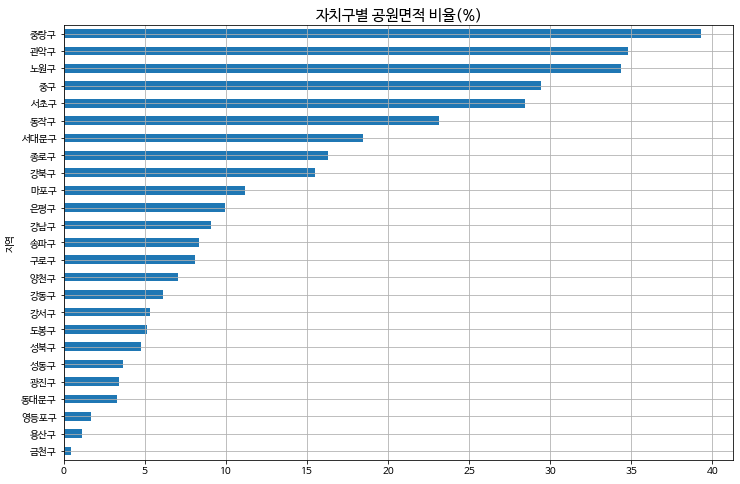

In [18]:
df.면적비율.sort_values().plot(kind='barh', grid=True, figsize=(12,8))
plt.title('자치구별 공원면적 비율(%)', size=15)
plt.show()

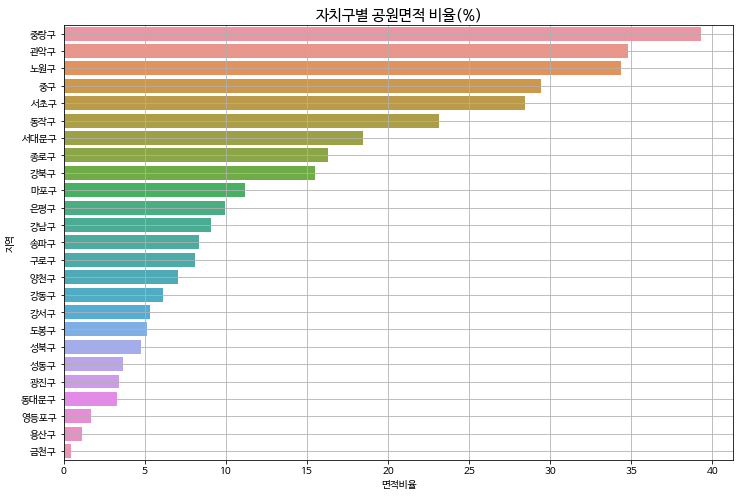

In [21]:
plt.figure(figsize=(12,8))
order = df.면적비율.sort_values(ascending=False).index
sns.barplot(x='면적비율', y=df.index, data=df, order=order)
plt.grid()
plt.title('자치구별 공원면적 비율(%)', size=15)
plt.show()